<a href="https://colab.research.google.com/github/balladembelemoussa/codesandbox-template-nuxt/blob/main/scikit_R%C3%A9gression_d'arbre_de_d%C3%A9cision_avec_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Régression d'arbre de décision avec AdaBoost 
Un arbre de décision est boosté à l'aide de l'algorithme AdaBoost.R2 [ 1 ] sur un jeu de données sinusoïdal 1D avec une petite quantité de bruit gaussien. 299 boosts (300 arbres de décision) sont comparés à un seul régresseur d'arbre de décision. Au fur et à mesure que le nombre de boosts augmente, le régresseur peut s'adapter à plus de détails.

[ 1 ]
H. Drucker, "Amélioration des régresseurs à l'aide de techniques de renforcement", 1997.

# Préparation des données 
Tout d'abord, nous préparons des données fictives avec une relation sinusoïdale et un peu de bruit gaussien.

In [1]:
# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

Entraînement et prédiction avec DecisionTree et AdaBoost Regressors 
Maintenant, nous définissons les classificateurs et les ajustons aux données. Ensuite, nous prévoyons sur ces mêmes données pour voir dans quelle mesure ils pourraient s'y adapter. Le premier régresseur est un DecisionTreeRegressoravec max_depth=4. Le deuxième régresseur est un AdaBoostRegressoravec un apprenant DecisionTreeRegressor de max_depth=4base et sera construit avec n_estimators=300 ces apprenants de base.

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Tracé des résultats 
Enfin, nous traçons dans quelle mesure nos deux régresseurs, le régresseur à arbre de décision unique et le régresseur AdaBoost, pourraient s'adapter aux données.

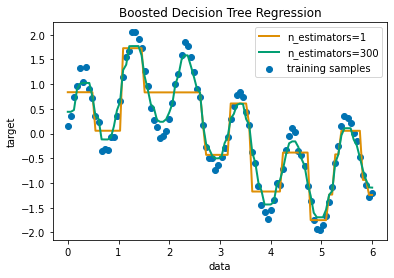

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()